<img src = "https://datahack.analyticsvidhya.com/media/__sized__/contest_cover/WNS-Analytics-Hackathon_1920-x-480px_1303P9x-thumbnail-1200x1200-90.jpg">

## Data Acquisition

In [1]:
import numpy as np
import pandas as pd

In [2]:
item_data_df = pd.read_csv(r'C:\Users\Varun Kurup\Documents\item_data.csv')
train_df = pd.read_csv(r'C:\Users\Varun Kurup\Documents\train.csv')
view_log_df = pd.read_csv(r'C:\Users\Varun Kurup\Documents\view_log.csv')

In [3]:
item_data_df.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [123]:
#train_df = pd.read_csv('train.csv')

In [4]:
train_df.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [125]:
#view_log_df = pd.read_csv('view_log.csv')

In [5]:
view_log_df.head()

,server_time,device_type,session_id,user_id,item_id
0,15-10-2018 08:58,android,112333,4557,32970
1,15-10-2018 08:58,android,503590,74788,7640
2,15-10-2018 08:58,android,573960,23628,128855
3,15-10-2018 08:58,android,121691,2430,12774
4,15-10-2018 08:58,android,218564,19227,28296


## Data Preprocessing

In [127]:
#Check Null values for item_data.csv

In [128]:
item_data_df.item_id.isnull().value_counts()

False    132761
Name: item_id, dtype: int64

In [129]:
item_data_df.item_price.isnull().value_counts()

False    132761
Name: item_price, dtype: int64

In [130]:
item_data_df.category_1.isnull().value_counts()

False    132761
Name: category_1, dtype: int64

In [131]:
item_data_df.category_2.isnull().value_counts()

False    132761
Name: category_2, dtype: int64

In [132]:
item_data_df.category_3.isnull().value_counts()

False    132761
Name: category_3, dtype: int64

In [133]:
item_data_df.product_type.isnull().value_counts()

False    132761
Name: product_type, dtype: int64

In [134]:
#Check null values for train.csv

In [135]:
train_df.impression_id.isnull().value_counts()

False    237609
Name: impression_id, dtype: int64

In [136]:
train_df.impression_time.isnull().value_counts()

False    237609
Name: impression_time, dtype: int64

In [137]:
train_df.user_id.isnull().value_counts()

False    237609
Name: user_id, dtype: int64

In [138]:
train_df.app_code.isnull().value_counts()

False    237609
Name: app_code, dtype: int64

In [139]:
train_df.os_version.isnull().value_counts()

False    237609
Name: os_version, dtype: int64

In [140]:
train_df.is_4G.isnull().value_counts()

False    237609
Name: is_4G, dtype: int64

In [141]:
train_df.is_click.isnull().value_counts()

False    237609
Name: is_click, dtype: int64

In [142]:
#Check null values for view_log.csv

In [143]:
view_log_df.server_time.isnull().value_counts()

False    1048575
Name: server_time, dtype: int64

In [144]:
view_log_df.server_time.isnull().value_counts()

False    1048575
Name: server_time, dtype: int64

In [145]:
view_log_df.device_type.isnull().value_counts()

False    1048575
Name: device_type, dtype: int64

In [146]:
view_log_df.session_id.isnull().value_counts()

False    1048575
Name: session_id, dtype: int64

In [147]:
view_log_df.user_id.isnull().value_counts()

False    1048575
Name: user_id, dtype: int64

In [148]:
view_log_df.item_id.isnull().value_counts()

False    1048575
Name: item_id, dtype: int64

### Data has no null values!

### Eliminating Features

In [6]:
train_df.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [7]:
test_df = pd.read_csv(r'C:\Users\Varun Kurup\Documents\test.csv')
test_df.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,13-12-2018 07:44,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,13-12-2018 07:45,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,13-12-2018 07:46,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,13-12-2018 07:47,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,13-12-2018 07:48,35431,242,latest,1


In [8]:
features = train_df[['app_code','impression_time','os_version','is_4G','is_click','user_id']]

In [9]:
test_features=test_df[['app_code','impression_time','os_version','is_4G','user_id']]

In [33]:
df_app_code=train_df['app_code'].value_counts().index.tolist()

In [34]:
df_app_counts=train_df['app_code'].value_counts().values.tolist()

In [42]:
def get_count(count):
    if count>10000:
        return 3
    elif count>1000:
        return 2
    elif count>100:
        return 1
    elif count>0:
        return 0
    

In [43]:
df_app_counts=pd.DataFrame(df_app_counts)

In [44]:
print(df_app_counts)

         0
0    33788
1    30706
2    17441
3    10851
4     9343
..     ...
485      1
486      1
487      1
488      1
489      1

[490 rows x 1 columns]


In [ ]:
#dummies = pd.get_dummies(train_df.os_version)
#dummies['old'] = dummies['old'].astype(int)
#dummies['latest'] = dummies['latest'].astype(int)
#dummies['intermediate'] = dummies['intermediate'].astype(int)
#dummies.info()

In [143]:
train_df = train_df.drop('os_version',axis = 1)

In [144]:
features = pd.concat([train_df,dummies] , axis = 1)
features.head()

,impression_id,impression_time,user_id,app_code,is_4G,is_click,intermediate,latest,old
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,0,0,0,0,1
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,1,1,0,1,0
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,1,0,1,0,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,1,0,0,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,0,0,0,1,0


In [145]:
dummies = pd.get_dummies(test_df.os_version)
dummies['old'] = dummies['old'].astype(int)
dummies['latest'] = dummies['latest'].astype(int)
dummies['intermediate'] = dummies['intermediate'].astype(int)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90675 entries, 0 to 90674
Data columns (total 3 columns):
intermediate    90675 non-null int32
latest          90675 non-null int32
old             90675 non-null int32
dtypes: int32(3)
memory usage: 1.0 MB


### Balancing Datsets

In [146]:
test_df = test_df.drop('os_version',axis = 1)

In [147]:
test_df = pd.concat([test_df,dummies] , axis = 1)
test_df.head()

,impression_id,impression_time,user_id,app_code,is_4G,intermediate,latest,old
0,a9e7126a585a69a32bc7414e9d0c0ada,13-12-2018 07:44,44754,127,1,0,1,0
1,caac14a5bf2ba283db7708bb34855760,13-12-2018 07:45,29656,44,0,0,1,0
2,13f10ba306a19ce7bec2f3cae507b698,13-12-2018 07:46,25234,296,1,0,1,0
3,39c4b4dc0e9701b55a0a4f072008fb3f,13-12-2018 07:47,22988,207,1,0,1,0
4,bf5a572cca75f5fc67f4b14e58b11d70,13-12-2018 07:48,35431,242,1,0,1,0


In [10]:
count_class_0, count_class_1 = features.is_click.value_counts()
features.is_click.value_counts()

0    226747
1     10862
Name: is_click, dtype: int64

In [11]:
df_class_0 = features[features['is_click'] == 0]
df_class_1 = features[features['is_click'] == 1]

In [12]:
df_class_0_under = df_class_0.sample(count_class_1)

In [13]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [14]:
df_test_under.is_4G.value_counts()

0    13900
1     7824
Name: is_4G, dtype: int64

In [15]:
df_test_under.head()

,app_code,impression_time,os_version,is_4G,is_click,user_id
94102,127,2018-11-25 18:58:00,latest,0,0,83902
214784,207,2018-12-07 09:52:00,old,1,0,79737
71988,207,2018-11-27 15:18:00,intermediate,0,0,70608
49326,371,2018-11-20 10:56:00,latest,0,0,31847
224739,207,2018-12-09 14:39:00,intermediate,1,0,61875


In [16]:
def map_os_version(os_version):
    if(os_version == 'old'):
        return 0
    elif(os_version == 'latest'):
        return 2
    else:
        return 1

In [17]:
df_test_under['os_version'] = df_test_under['os_version'].map(map_os_version)
df_test_under.head()

,app_code,impression_time,os_version,is_4G,is_click,user_id
94102,127,2018-11-25 18:58:00,2,0,0,83902
214784,207,2018-12-07 09:52:00,0,1,0,79737
71988,207,2018-11-27 15:18:00,1,0,0,70608
49326,371,2018-11-20 10:56:00,2,0,0,31847
224739,207,2018-12-09 14:39:00,1,1,0,61875


In [18]:
test_df['os_version'] = test_df['os_version'].map(map_os_version)
test_df.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,13-12-2018 07:44,44754,127,2,1
1,caac14a5bf2ba283db7708bb34855760,13-12-2018 07:45,29656,44,2,0
2,13f10ba306a19ce7bec2f3cae507b698,13-12-2018 07:46,25234,296,2,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,13-12-2018 07:47,22988,207,2,1
4,bf5a572cca75f5fc67f4b14e58b11d70,13-12-2018 07:48,35431,242,2,1


In [19]:
def date_clean(date):
    str1,str2 = date.split(' ')
    return str2

In [20]:
df_test_under['impression_time'] = df_test_under['impression_time'].apply(date_clean)
df_test_under.head()

,app_code,impression_time,os_version,is_4G,is_click,user_id
94102,127,18:58:00,2,0,0,83902
214784,207,09:52:00,0,1,0,79737
71988,207,15:18:00,1,0,0,70608
49326,371,10:56:00,2,0,0,31847
224739,207,14:39:00,1,1,0,61875


In [21]:
test_df['impression_time'] = test_df['impression_time'].apply(date_clean)
test_df.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,07:44,44754,127,2,1
1,caac14a5bf2ba283db7708bb34855760,07:45,29656,44,2,0
2,13f10ba306a19ce7bec2f3cae507b698,07:46,25234,296,2,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,07:47,22988,207,2,1
4,bf5a572cca75f5fc67f4b14e58b11d70,07:48,35431,242,2,1


In [22]:
def get_time(time):
    new_time = int(time[0]+time[1])
    if(new_time >= 6 and new_time <= 18):
        return '1' # 1 - morning 
    else:
        return '0' # 2- night

In [23]:
df_test_under['impression_time'] = df_test_under['impression_time'].apply(get_time)
df_test_under.head()


,app_code,impression_time,os_version,is_4G,is_click,user_id
94102,127,1,2,0,0,83902
214784,207,1,0,1,0,79737
71988,207,1,1,0,0,70608
49326,371,1,2,0,0,31847
224739,207,1,1,1,0,61875


In [24]:
df_test_under['impression_time']=df_test_under['impression_time'].to_numpy(copy=True)

In [25]:
print(type(df_test_under['impression_time']))

<class 'pandas.core.series.Series'>


In [26]:
test_df['impression_time'] = test_df['impression_time'].apply(get_time)
test_df.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,1,44754,127,2,1
1,caac14a5bf2ba283db7708bb34855760,1,29656,44,2,0
2,13f10ba306a19ce7bec2f3cae507b698,1,25234,296,2,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,1,22988,207,2,1
4,bf5a572cca75f5fc67f4b14e58b11d70,1,35431,242,2,1


In [27]:
test_df['impression_time'].to_numpy(copy=True)

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [28]:
df_test_under.is_click.value_counts()

1    10862
0    10862
Name: is_click, dtype: int64

In [29]:
X_train = df_test_under[['app_code','impression_time','os_version','is_4G']]
y_train = df_test_under['is_click']
X_test = test_df[['app_code','impression_time','os_version','is_4G']]

In [28]:
X_train.corr()

,app_code,os_version,is_4G
app_code,1.000000,-0.001382,-0.068175
os_version,-0.001382,1.000000,0.116554
is_4G,-0.068175,0.116554,1.000000


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
clf1=LogisticRegression()
clf1.fit(np.array(X_train),np.array(y_train))

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
x__train,x__test,y__train,y__test = train_test_split(X_train,y_train)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []

In [33]:
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x__train,y__train)
    yhat=neigh.predict(x__test)
    mean_acc[n-1] = metrics.accuracy_score(y__test, yhat)

    
    std_acc[n-1]=np.std(yhat==y__test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.57392745, 0.57613699, 0.59933714, 0.59860063, 0.60154668,
       0.5971276 , 0.61277849, 0.59915301, 0.61185785, 0.61112134,
       0.6160928 , 0.61222611, 0.61995949, 0.60522924, 0.61922298,
       0.61517216, 0.61517216, 0.62032775, 0.62364205, 0.62088013,
       0.62308967, 0.62106426, 0.62603572, 0.62621985])

In [34]:
neigh = KNeighborsClassifier(n_neighbors = 105).fit(x__train,y__train)

In [35]:
neigh.score(x__test,y__test)

0.6339532314490886

In [35]:
neigh = KNeighborsClassifier(n_neighbors = 105).fit(X_train,y_train)

In [171]:
y_pred1 = neigh.predict(x__test)

In [172]:
y_pred23=neigh.predict(X_test)

In [313]:
df32=pd.DataFrame(y_pred23)

In [314]:
df2=train_df['impression_id']

In [315]:
dfoverallkmean=pd.merge(df2,df32,left_index=True,right_index=True)

In [316]:
dfoverallkmean.to_csv(r'C:\Users\Varun Kurup\Documents\knnmodifiedsolution.csv')

In [173]:
from sklearn.metrics import f1_score
k_f1=f1_score(y__test,y_pred1,average='weighted')
print(k_f1)

0.6410037102524341


In [264]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,1
2,0
3,0
4,0


In [265]:
impression_id = pd.DataFrame(test_df['impression_id'])

In [266]:
submit_df = pd.concat([impression_id,y_pred],axis = 1)

In [267]:
submit_df.head()

,impression_id,0
0,a9e7126a585a69a32bc7414e9d0c0ada,0
1,caac14a5bf2ba283db7708bb34855760,1
2,13f10ba306a19ce7bec2f3cae507b698,0
3,39c4b4dc0e9701b55a0a4f072008fb3f,0
4,bf5a572cca75f5fc67f4b14e58b11d70,0


In [268]:
submit_df.to_csv('submission.csv')

In [269]:
import xgboost as xgb

In [270]:
max_score = 0
j = 0

In [271]:
from sklearn.ensemble import AdaBoostClassifier

In [272]:
for i in range (0,151):
    clf = AdaBoostClassifier(random_state = i,n_estimators = 100)
    clf.fit(x__train,y__train)
    if(clf.score(x__train,y__train)<clf.score(x__test,y__test)):
        print(i)
        if(max_score < clf.score(x__test,y__test)):
            max_score = clf.score(x__test,y__test)
            j = i
    else:
        print('Overfit {}'.format(i))
        if(max_score < clf.score(x__test,y__test) ):
            max_score = clf.score(x__test,y__test)
            j = i

Overfit 0
Overfit 1
Overfit 2
Overfit 3
Overfit 4
Overfit 5
Overfit 6
Overfit 7
Overfit 8
Overfit 9
Overfit 10
Overfit 11
Overfit 12
Overfit 13
Overfit 14
Overfit 15
Overfit 16
Overfit 17
Overfit 18
Overfit 19
Overfit 20
Overfit 21
Overfit 22
Overfit 23
Overfit 24
Overfit 25
Overfit 26
Overfit 27
Overfit 28
Overfit 29
Overfit 30
Overfit 31
Overfit 32
Overfit 33
Overfit 34
Overfit 35
Overfit 36
Overfit 37
Overfit 38
Overfit 39
Overfit 40
Overfit 41
Overfit 42
Overfit 43
Overfit 44
Overfit 45
Overfit 46
Overfit 47
Overfit 48
Overfit 49
Overfit 50
Overfit 51
Overfit 52
Overfit 53
Overfit 54
Overfit 55
Overfit 56
Overfit 57
Overfit 58
Overfit 59
Overfit 60
Overfit 61
Overfit 62
Overfit 63
Overfit 64
Overfit 65
Overfit 66
Overfit 67
Overfit 68
Overfit 69
Overfit 70
Overfit 71
Overfit 72
Overfit 73
Overfit 74
Overfit 75
Overfit 76
Overfit 77
Overfit 78
Overfit 79
Overfit 80
Overfit 81
Overfit 82
Overfit 83
Overfit 84
Overfit 85
Overfit 86
Overfit 87
Overfit 88
Overfit 89
Overfit 90
Overfit 9

In [273]:
max_score

0.5199779046216166

In [274]:
j

0

In [275]:
y_pred = clf.predict(X_test)

In [276]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [277]:
impression_id = pd.DataFrame(test_df['impression_id'])

In [278]:
submit_df.head()

,impression_id,0
0,a9e7126a585a69a32bc7414e9d0c0ada,0
1,caac14a5bf2ba283db7708bb34855760,1
2,13f10ba306a19ce7bec2f3cae507b698,0
3,39c4b4dc0e9701b55a0a4f072008fb3f,0
4,bf5a572cca75f5fc67f4b14e58b11d70,0


In [279]:
submit_df.to_csv('submission_2.csv')

In [280]:
#df_test_under.head(15)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logit = LogisticRegression()

In [37]:
logit.fit(x__train,y__train)

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
logit.score(x__train,y__train)

0.5208985453875897

In [39]:
logit.score(x__test,y__test)

0.5249493647578715

In [36]:
import lightgbm as ltb

In [37]:
modellgb=ltb.LGBMClassifier()

In [38]:
modellgb.fit(np.array(x__train),np.array(y__train))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [39]:
yhat32=modellgb.predict(np.array(x__test))

In [40]:
from sklearn.metrics import f1_score
lgbm1f1=f1_score(y__test,yhat32,average='weighted')
print(lgbm1f1)

0.6332274263599443


In [45]:
from sklearn.ensemble import ExtraTreesClassifier 

In [46]:
model=ExtraTreesClassifier()

In [47]:
model.fit(X_train,y_train)

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [48]:
import matplotlib.pyplot as plt

In [49]:
print(model.feature_importances_)

[0.9629551 0.0083377 0.0219141 0.0067931]


In [50]:
feat_importances=pd.Series(model.feature_importances_,index=X_train.columns)

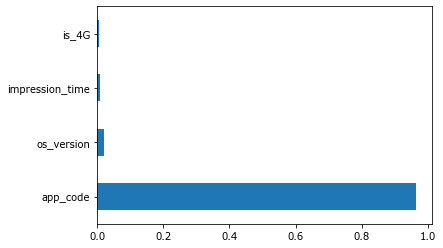

In [51]:
feat_importances.nlargest(6).plot(kind='barh')

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []

In [82]:
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x__train,y__train)
    yhat=neigh.predict(x__test)
    mean_acc[n-1] = metrics.accuracy_score(y__test, yhat)

    
    std_acc[n-1]=np.std(yhat==y__test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.57153379, 0.55477813, 0.58239735, 0.56895599, 0.59767999,
       0.59860063, 0.60412447, 0.59767999, 0.60743878])

In [116]:
neigh = KNeighborsClassifier(n_neighbors = 100).fit(x__train,y__train)

In [117]:
neigh.score(x__test,y__test)

0.6326643343767262

In [57]:
from xgboost import XGBClassifier  

In [296]:
model=ExtraTreesClassifier()

In [298]:
neigh.score(X_train,y_train)

0.6409961333087829

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
Dps = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25]
meantesacc = []
meantrainacc = []
ConfustionMx = []
for d in Dps:
    dtc=DecisionTreeClassifier(criterion="entropy",max_depth=d)
    dtc.fit(x__train,y__train)
    meantrainacc.append(metrics.accuracy_score(y__train,dtc.predict(x__train)))
    meantesacc.append(metrics.accuracy_score(y__test,dtc.predict(x__test)))


meantesacc

[0.5407843859326091,
 0.5956545755846069,
 0.6151721598232369,
 0.6245626956361627,
 0.6275087460872767,
 0.6378199226661757,
 0.6356103848278402,
 0.6402135886577057,
 0.6357945129810348,
 0.6378199226661757,
 0.6402135886577057,
 0.6363468974406187,
 0.6341373596022832,
 0.6352421285214509,
 0.6345056159086724,
 0.63321671883631,
 0.6328484625299208,
 0.6317436936107531,
 0.6322960780703369,
 0.6321119499171424,
 0.6322960780703369,
 0.6311913091511692,
 0.6310071809979746]

In [48]:
from xgboost import XGBClassifier  

In [49]:
modelx=XGBClassifier()
modelx.fit(np.array(x__train),np.array(y__train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
y_predt=modelx.predict(np.array(x__test))

In [51]:
from sklearn.metrics import f1_score
xgb_f1=f1_score(y__test,y_predt,average='weighted')
print(xgb_f1)

0.6254786565332404


In [224]:
from sklearn.neural_network import MLPClassifier
clf_NN=MLPClassifier(solver='lbfgs',alpha=0.5,hidden_layer_sizes=(1000,250),random_state=100)
clf_NN.fit(np.array(x__train),np.array(y__train))

MLPClassifier(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 250), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=100, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [225]:
ypredrrt=clf_NN.predict(x__test)

In [226]:
from sklearn.metrics import f1_score
mlp_score=f1_score(y__test,ypredrrt,average='weighted')
print(mlp_score)

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3404153914030901


In [80]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgb_estimator = ltb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc')

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=3)
lgb_model = gsearch.fit(np.array(x__train), np.array(y__train))
print(lgb_model.best_params_)
print(lgb_model.best_score_)                  

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Varun Kurup\Anaconda3\lib\site-

{'lambda_l1': 1.5, 'lambda_l2': 1, 'min_data_in_leaf': 100, 'num_leaves': 31, 'reg_alpha': 0.1}
0.63082305284478


In [66]:
xgb1 = XGBClassifier(
 learning_rate = 0.5,
 n_estimators=100,
 max_depth=3,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.7,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=8,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(np.array(x__train), np.array(y__train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=8, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.7, verbosity=1)

In [67]:
ypredxgb=xgb1.predict(np.array(x__test))

In [68]:
from sklearn.metrics import f1_score
xgb_f1=f1_score(y__test,ypredxgb,average='weighted')
print(xgb_f1)

0.6279654024693547


In [189]:
from sklearn.naive_bayes import MultinomialNB

In [190]:
nbmodel=MultinomialNB()

In [191]:
nbmodel.fit(x__train,y__train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [192]:
ynb=nbmodel.predict(x__test)

In [193]:
from sklearn.metrics import f1_score
nb_f1=f1_score(y__test,ynb,average='weighted')
print(nb_f1)

0.49403830481096345


In [194]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(DecisionTreeClassifier(max_depth=21),n_estimators=200)
classifier.fit(x__train,y__train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=21,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [195]:
yada=classifier.predict(x__test)

In [196]:
from sklearn.metrics import f1_score
adadc_f1=f1_score(y__test,yada,average='weighted')
print(adadc_f1)

0.6212986421296469


In [57]:
from tpot import TPOTClassifier
tpot=TPOTClassifier(generations=5,population_size=500,verbosity=2)
tpot.fit(x__train,y__train)
print(tpot.score(x__test,y__test))
tpot.export(r'C:\Users\Varun Kurup\tpot_baseline.py')

Generation 1 - Current best internal CV score: 0.6400911034296863
Generation 2 - Current best internal CV score: 0.6400911034296863
Generation 3 - Current best internal CV score: 0.6416867979139225
Generation 4 - Current best internal CV score: 0.6416867979139225
Generation 5 - Current best internal CV score: 0.6416867979139225

Best pipeline: GradientBoostingClassifier(SelectFromModel(input_matrix, criterion=entropy, max_features=0.6500000000000001, n_estimators=100, threshold=0.45), learning_rate=0.1, max_depth=4, max_features=0.45, min_samples_leaf=3, min_samples_split=17, n_estimators=100, subsample=0.9500000000000001)
0.6330325906831155


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gbmodel=GradientBoostingClassifier(learning_rate=0.5,max_depth=3,max_features=0.9500000001,min_samples_leaf=14,min_samples_split=17,n_estimators=100,subsample=0.7)

In [44]:
gbmodel.fit(x__train,y__train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=0.9500000001, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=14, min_samples_split=17,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
ypredgb=gbmodel.predict(x__test)

In [46]:
from sklearn.metrics import f1_score
gbc_f1=f1_score(y__test,ypredgb,average='weighted')
print(gbc_f1)

0.6262866937340789


In [227]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

Using TensorFlow backend.


In [239]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(5, embed_dim,input_length = 4))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4, 128)            640       
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 4, 128)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 197       
Total params: 255,637
Trainable params: 255,637
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
from sklearn.ensemble import RandomForestClassifier
clf1= RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.6000000000000001, min_samples_leaf=7, min_samples_split=5, n_estimators=100)
clf1.fit(x__train,y__train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.6000000000000001,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=7,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [78]:
yprertf=clf1.predict(x__test)

In [79]:
from sklearn.metrics import f1_score
rfc_f1=f1_score(y__test,yprertf,average='weighted')
print(rfc_f1)

0.6256946081539124


In [107]:
import featuretools as ft

In [108]:
combine=df_test_under.append(test_df)

C:\Users\Varun Kurup\Anaconda3\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [141]:
es=ft.EntitySet(id='df_test_under')

In [142]:
es.entity_from_dataframe(entity_id = 'impression_id', dataframe = combine, index = 'impression_id')

Entityset: df_test_under
  Entities:
    impression_id [Rows: 112399, Columns: 7]
  Relationships:
    No relationships

In [184]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
target_entity = 'impression_id', 
max_depth = 2, 
verbose = 1, 
n_jobs = 3)

Built 6 features
EntitySet scattered to 3 workers in 51 seconds                                                                         
Elapsed: 00:04 | Progress: 100%|█████████████████████████████████████████████████████████████████████| Remaining: 00:00


Task exception was never retrieved
future: <Task finished coro=<BaseTCPConnector.connect() done, defined at C:\Users\Varun Kurup\Anaconda3\lib\site-packages\distributed\comm\tcp.py:349> exception=CommClosedError('in <distributed.comm.tcp.TCPConnector object at 0x0000027B3486AF28>: ConnectionRefusedError: [Errno 10061] Unknown error')>
Traceback (most recent call last):
  File "C:\Users\Varun Kurup\Anaconda3\lib\site-packages\distributed\comm\tcp.py", line 356, in connect
    ip, port, max_buffer_size=MAX_BUFFER_SIZE, **kwargs
  File "C:\Users\Varun Kurup\Anaconda3\lib\site-packages\tornado\tcpclient.py", line 280, in connect
    af, addr, stream = await connector.start(connect_timeout=timeout)
  File "C:\Users\Varun Kurup\Anaconda3\lib\site-packages\tornado\tcpclient.py", line 143, in on_connect_done
    stream = future.result()
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 

In [171]:
feature_matrix.columns

Index(['app_code', 'impression_time', 'is_4G', 'is_click', 'os_version',
       'user_id'],
      dtype='object')

In [172]:
feature_matrix = feature_matrix.reindex(index=combine['impression_id'])
feature_matrix = feature_matrix.reset_index()

In [173]:
feature_matrix.shape

(112399, 7)

In [174]:
feature_matrix.drop(['impression_id'], axis=1, inplace=True)
train = feature_matrix[:90676]
test = feature_matrix[90676:]

In [175]:
feature_matrix['is_click'].dropna()

Series([], Name: is_click, dtype: float64)

In [176]:
train.drop(['user_id'], axis=1, inplace=True)
test.drop(['user_id'], axis=1, inplace=True)

In [177]:
train.dropna()

,app_code,impression_time,is_4G,is_click,os_version


In [178]:
ytrain=train['is_click']

In [179]:
ytrain.dropna()

Series([], Name: is_click, dtype: float64)

In [180]:
ytest.dropna()

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21719    1.0
21720    1.0
21721    1.0
21722    1.0
21723    1.0
Name: is_click, Length: 21724, dtype: float64

In [181]:
train.drop(['is_click'],axis=1,inplace=True)

In [182]:
from sklearn.model_selection import train_test_split

# splitting train data into training and validation set
xtrain, xvalid, ytrain, yvalid = train_test_split(train, ytest, test_size=0.25, random_state=11)

In [183]:
from sklearn.ensemble import RandomForestClassifier
clf2= RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.6000000000000001, min_samples_leaf=7, min_samples_split=5, n_estimators=100)
clf2.fit(np.array(xtrain),np.array(ytrain))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [61]:
ngb=GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features=0.2, min_samples_leaf=2, min_samples_split=19, n_estimators=100, subsample=0.7000000000000001)



In [63]:
ngb.fit(x__train,y__train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=8,
                           max_features=0.2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=19,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.7000000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
ypredgb=ngb.predict(x__test)

In [65]:
from sklearn.metrics import f1_score
nbgc_f1=f1_score(y__test,ypredgb,average='weighted')
print(nbgc_f1)

0.6215140728464713
